# Principal Component Analysis

PCA is an unsupervised learning method that is often used to reduce the dimensionality of the data set by transforming a large set into a lower dimensional set that still contains most of the information of the large set.

PCA finds a new set of dimensions such that all the dimensions are orthogonal and ranked according to variance along them. <br>
Find a transformation such that, 
* The transformed features are linearly independent
* Dimensionality can be reduced by taking only the dimensions with the highest importance.
* Those newly found dimensions should maximize the projection error
* The projected points should have maximum spread, i.e. maximum variance

Variance: How much variation or spread the data has
$$Var(X) = \frac{1}{n} \sum(X_{i} - \bar{X}) ^ 2$$

Covariance matrix: Indicates the level to which two variables vary together
$$Cov(X, Y) = \frac{1}{n} \sum(X_{i} - \bar{X})(Y_{i} - \bar{Y})^T$$
$$Cov(X, X) = \frac{1}{n} \sum(X_{i} - \bar{X})(X_{i} - \bar{X})^T$$

Calculate eigen vectors of Cov(X, X), <br>
The eigen vectors point in the direction of the maximum variance, and the corresponding eigen values indicate the importance of its corresponding eigen vector

Steps:
* Subtract the mean from X
* Calculate Cov(X, X)
* Calculate eigen vectors and eigen values of the covariance matrix
* Sort the eigen vectors according to their eigen vaues in decreasing order 
* Choose first k eigen vectors and that will be the new k dimensions
* Transform the original n-dimension data points into k dimensions

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
class PCA:
    def __init__(self, n_components):
        """
        Initialize the PCA object with the desired number of components.

        Parameters:
        - n_components: The number of principal components to retain.
        """
        self.n_components = n_components
        self.components = None
        self.mean = None

    def fit(self, X):
        """
        Fit the PCA model to the input data.

        Parameters:
        - X: The input data matrix.

        Notes:
        - The mean of the input data is subtracted and eigen decomposition is performed
          to compute the principal components.
        """
        self.mean = np.mean(X, axis=0)
        X = X - self.mean
        cov = np.cov(X.T)
        eigen_vectors, eigen_values = np.linalg.eig(cov)
        eigen_vectors = eigen_vectors.T
        idxs = np.argsort(eigen_values)[::-1]
        eigen_values = eigen_values[idxs]
        eigen_vectors = eigen_vectors[idxs]
        self.components =  eigen_vectors[:self.n_components]

    def transform(self, X):
        """
        Project the input data onto the principal components.

        Parameters:
        - X: The input data matrix.

        Returns:
        - transformed_X: The transformed data matrix with reduced dimensions.
        """
        X = X - self.mean
        return np.dot(X, self.components.T)

In [3]:
# data = datasets.load_digits()
data = datasets.load_iris()
X = data.data
y = data.target

# Project the data onto the 2 primary principal components
pca = PCA(2)
pca.fit(X)
X_projected = pca.transform(X)
print("Shape of X:", X.shape)
print("Shape of transformed X:", X_projected.shape)

Shape of X: (150, 4)
Shape of transformed X: (150, 2)


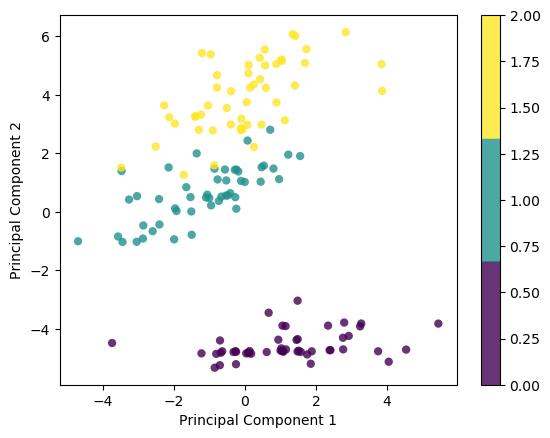

In [4]:
x1 = X_projected[:, 0]
x2 = X_projected[:, 1]

plt.scatter(
    x1, x2, c=y, edgecolor="none", alpha=0.8, cmap=plt.cm.get_cmap("viridis", 3)
)

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar()
plt.show()